In [7]:
import numpy as np
import matplotlib.pyplot as plt

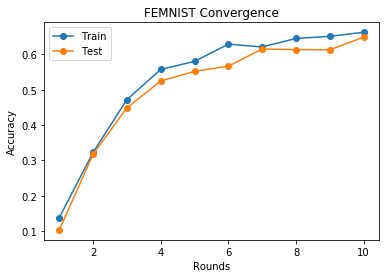

In [8]:
# svd_train_accuracies = [0.0942163, 0.32256, 0.461104, 0.544892, 0.582244]
# svd_test_accuracies = [0.0785127, 0.31313, 0.461178,  0.533197, 0.56859]

# full rank
svd_train_accuracies_full = [0.138588, 0.322955, 0.47214, 0.557138, 0.579983, 0.628616, 0.620728, 0.644605, 0.65075, 0.662249]
svd_test_accuracies = [0.103851, 0.317736, 0.449005, 0.524477, 0.551886, 0.566456, 0.614988, 0.613086,  0.612654, 0.648308]

#100-rank 
svd_train_accuracies_100 = [0.0539205, 0.0747245, 0.207245, 0.349931, 0.409138, 0.470209, 0.499412, 0.528098, 0.54781, 0.577126]
# svd_test_accuracies = [0.0613994, ]


rounds = np.arange(1, 11)
plt.plot(rounds, svd_train_accuracies_full, marker='o', label="Train")
plt.plot(rounds, svd_test_accuracies, marker='o', label="Test")
plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Convergence")
plt.legend()
plt.savefig('svd_full.png')


[0.0, 0.138571, 0.0, 0.372414, 0.271805, 0.415385, 0.462302, 0.403922, 0.577897, 0.531066, 0.396364, 0.6959, 0.571123, 0.497059, 0.271429, 0.61548, 0.33125, 0.631579, 0.4375, 0.639898, 0.453535, 0.644444, 0.5, 0.6225, 0.6, 0.516364, 0.673684, 0.6, 0.585455, 0.579412, 0.6625, 0.5875, 0.458242, 0.647059, 0.555556, 0.44798, 0.370588, 0.488889, 0.588235, 0.564286, 0.476471, 0.620814, 0.55, 0.694118, 0.594545, 0.687171, 0.716099, 0.5, 0.65, 0.52033, 0.65, 0.6, 0.645455, 0.453535, 0.45, 0.632727, 0.647059, 0.609402, 0.618421, 0.682456, 0.665789, 0.734586, 0.71, 0.678289, 0.632353, 0.610096, 0.554545, 0.653216, 0.640974, 0.423529, 0.643464, 0.5, 0.731579, 0.621324, 0.458242, 0.64578, 0.544444, 0.564286, 0.820124, 0.635294]
[0.0721635, 0.224671, 0.477938, 0.536459, 0.503818, 0.619484, 0.630977, 0.625259, 0.71245, 0.692938, 0.587198, 0.79512, 0.778348, 0.684566, 0.679812, 0.731567, 0.744367, 0.731861, 0.704122, 0.75335, 0.600676, 0.750122, 0.777304, 0.782494, 0.716868, 0.774686, 0.762797, 0.766

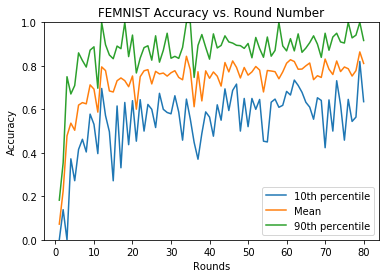

In [53]:
f = open("svd_experiments/1000-rank-svd-80rds-eval1.txt", "r")
test_accuracies_10th = []
test_accuracies_mean = []
test_accuracies_90th = []

for x in f:
    if x.startswith("test_accuracy"):
        terms = x.split()
        test_accuracies_10th += [float(terms[4][:-1])]
        test_accuracies_mean += [float(terms[1][:-1])]
        test_accuracies_90th += [float(terms[-1])]
print(test_accuracies_10th)
print(test_accuracies_mean)
print(test_accuracies_90th)



rounds = list(np.arange(1, 81))
# rounds.remove(20)
print(rounds)
print(len(test_accuracies_10th))
print(len(rounds))
axes = plt.gca()
axes.set_ylim([0,1])

plt.plot(rounds, test_accuracies_10th, label="10th percentile")
plt.plot(rounds, test_accuracies_mean, label="Mean")
plt.plot(rounds, test_accuracies_90th, label="90th percentile")

plt.xlabel("Rounds")
plt.ylabel("Accuracy")
plt.title("FEMNIST Accuracy vs. Round Number")
plt.legend()
plt.savefig('1000rank.png')
        